In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# help from 
# https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

# define activation function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

# create a class for the NN
class NeuralNetwork:
    # initialisation of class
    def __init__(self, x, y):
        self.input = x # set input
        self.weights1 = np.random.rand(self.input.shape[1],4) # set initial weights
        self.weights2 = np.random.rand(4,1) # set other weights
        self.y = y # set up size of output
        self.output = np.zeros(y.shape) # set up output
        self.loss = [] # set up loss function array
    
    # feed forward function.
    # this is wehre the matrix multiplication occurs to pass forward the weights
    # we assume our bias is 0.
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        self.loss.append(self.MSE())
        
    # we need a way to evaluate our predictions
    # so we use a loss function (Mean Squared Error)
    def MSE(self):
        total = 0 # keeping track of sum
        n = len(self.y) 
        for i in range(0,n):
            difference_squared = (self.y[i] - self.output[i])**2 # y - p
            total = total + difference_squared  # taking a sum of all the squared differences
            MSE = total/n  # average
        return MSE[0]
        
    # we need to propagate error back
    # so we build backprop function to adjust weights and biases
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    def plot_loss_per_iteration(self):
        a4_dims = (11.7, 8.27)
        iterations = [i for i in range(len(self.loss))]
        plt.figure(figsize=a4_dims)
        plt.plot(iterations, self.loss)
        plt.suptitle('Loss per iteration', fontsize=12)

[[0.01318097]
 [0.98109687]
 [0.97649172]
 [0.0234396 ]]


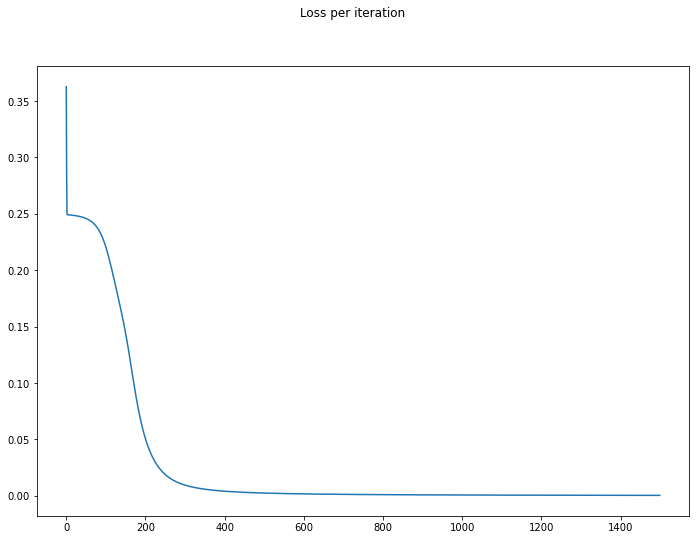

In [10]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

for i in range(1500):
    nn.feedforward()
    nn.backprop()
    
print(nn.output)
nn.plot_loss_per_iteration()